In [20]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library

import os

In [21]:
data = pd.read_csv("Scaled_BreastCancer_Data.csv")
data


,Unnamed: 0,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Target
0,0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0.0
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0.0
2,2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0.0
3,3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0.0
4,4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,0.0
565,565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,0.0
566,566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,0.0
567,567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,0.0


In [22]:
data=data.drop(['Unnamed: 0'], axis=1)

In [23]:
# data['diagnosis'] = data['diagnosis'].map({'M': 0, 'B': 1}).astype(float)
X = data.drop(["Target"], axis=1) 
y = data["Target"]

In [24]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: Target, Length: 569, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
from sklearn import neural_network
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
nn.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=1)

In [34]:
accuracy = nn.score(x_test, y_test)
print("Score for Neural Net Model: \n", accuracy*100 )

Score for Neural Net Model: 
 96.49122807017544


In [35]:
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation
from sklearn.metrics import confusion_matrix

y_pred_train = nn.predict(x_train)
y_pred_test = nn.predict(x_test)

# accuracy_train = r2_score(y_train, y_pred_train)
# print("Training Accuracy for Neural Net Model: ", accuracy_train)

# accuracy_test = r2_score(y_test, y_pred_test)
# print("Testing Accuracy for Neural Net Model: ", accuracy_test)

# RMSE_train = sqrt(mean_squared_error(y_train, y_pred_train))
# print("RMSE for Training Data: ", RMSE_train)

# RMSE_test = sqrt(mean_squared_error(y_test, y_pred_test))
# print("RMSE for Testing Data: ", RMSE_test)

cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix: \n", cm )

Confusion Matrix: 
 [[38  4]
 [ 0 72]]


<AxesSubplot:>

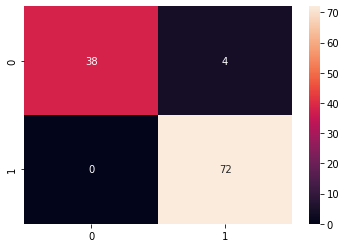

In [36]:
#confusion_matrix 

from sklearn.metrics import confusion_matrix 
import seaborn as sns

cm=confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm,annot=True,fmt='g')